In [33]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const

In [34]:
sn2008d = dataloader.load_comparison_json_phot('SN2008D.json', phase0=54490)
ptf13bvn = dataloader.load_comparison_json_phot('iPTF13bvn.json', phase0=(2456477.5 - 2400000.5))

# load the sn2019odp lc
ztf = table.Table.read('../data/ztflc_forcefit.h5')
ztf['mag'] = -2.5*np.log10(ztf['ampl']) + ztf['magzp']
ztf['phase'] = ztf['obsmjd'] - const.sne_peak_mjd['g']
ztf['mag_err'] = ztf['ampl.err']/ztf['ampl']*1.087 + ztf['magzprms']
ztf.sort('phase')



sn2008d

<ipython-input-34-2d6301799b88>:6: RuntimeWarning: invalid value encountered in log10
  ztf['mag'] = -2.5*np.log10(ztf['ampl']) + ztf['magzp']


mjd band instrument     mag  mag_err      phase
0    54474.52000    B       None  19.560    0.050  -15.48000
1    54474.52000    I       None  18.450    0.050  -15.48000
2    54474.52000    R       None  18.700    0.050  -15.48000
3    54474.52000    V       None  19.100    0.050  -15.48000
4    54475.01200    V       None  19.100    0.060  -14.98800
..           ...  ...        ...     ...      ...        ...
438  54594.15625   r'       None  19.637    0.083  104.15625
439  54594.15926    V       None  20.163    0.135  104.15926
440  54615.14264   i'       None  19.359    0.111  125.14264
441  54615.14566   r'       None  20.043    0.131  125.14566
442  54615.15240    B       None  21.415    0.446  125.15240

[443 rows x 6 columns]

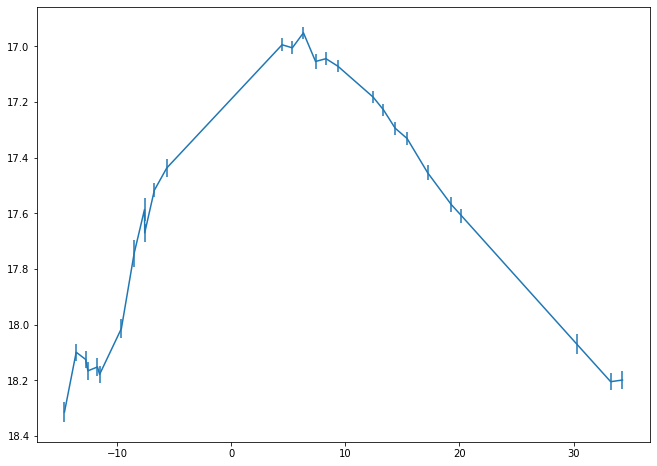

In [4]:
df = sn2008d.query("band == \"r'\" and phase < 40")
plt.figure(figsize=(11,8))
plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'])
plt.gca().invert_yaxis()

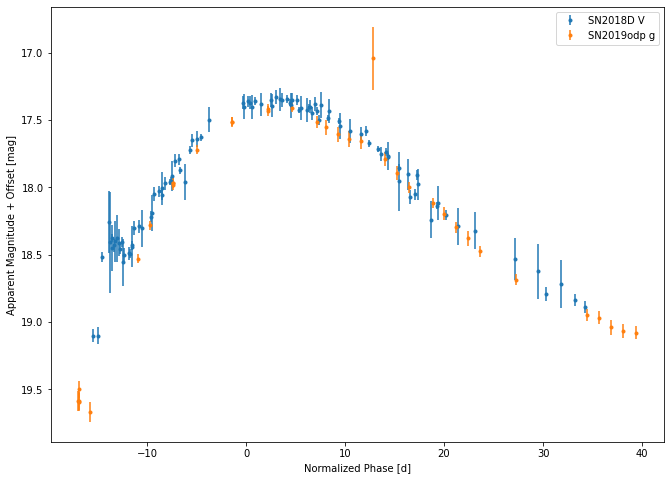

In [7]:
df = sn2008d.query("band == \"V\" and phase < 40")
plt.figure(figsize=(11,8))
plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='SN2018D V', fmt='.')

band = 'g'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
plt.errorbar((ztf['obsmjd'][idx] - const.sne_peak_mjd['g']+2.5)*1.2, ztf['mag'][idx]+0.9, yerr=ztf['mag_err'][idx], label='SN2019odp %s' % band, fmt='.')

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Normalized Phase [d]')
plt.ylabel('Apparent Magnitude + Offset [mag]')
plt.savefig('../paper/plots/tmp_lc_sn2008d_g.png')

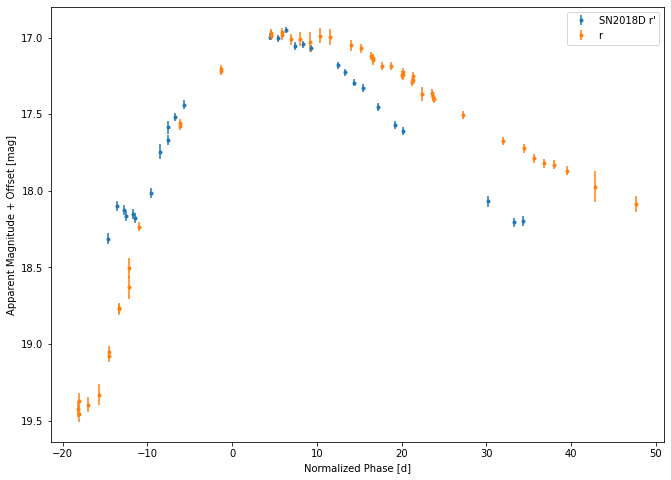

In [9]:
plt.figure(figsize=(11,8))

df = sn2008d.query("band == \"r'\" and phase < 40")
plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='SN2018D r\'', fmt='.')

df = sn2008d.query("band == \"R\" and phase < 40")
#plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='SN2018D R', fmt='.')

band = 'r'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
plt.errorbar((ztf['obsmjd'][idx] - const.sne_peak_mjd['g']+2.5)*1.2, ztf['mag'][idx]+0.7, yerr=ztf['mag_err'][idx], label=band, fmt='.')

plt.gca().invert_yaxis()
plt.legend()

plt.xlabel('Normalized Phase [d]')
plt.ylabel('Apparent Magnitude + Offset [mag]')
plt.savefig('../paper/plots/tmp_lc_sn2008d_r.png')

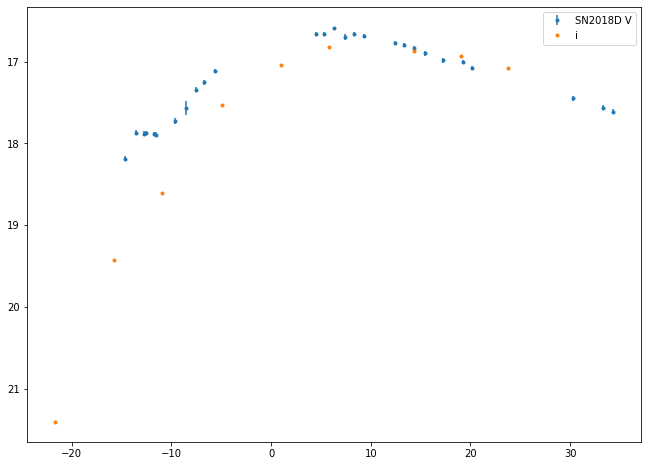

In [73]:
df = sn2008d.query("band == \"i'\" and phase < 40")
plt.figure(figsize=(11,8))
plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='SN2018D V', fmt='.')

band = 'i'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
plt.errorbar((ztf['obsmjd'][idx] - const.sne_peak_mjd['g']+2.5)*1.2, ztf['mag'][idx]+0.5, label=band, fmt='.')

plt.gca().invert_yaxis()
plt.legend()

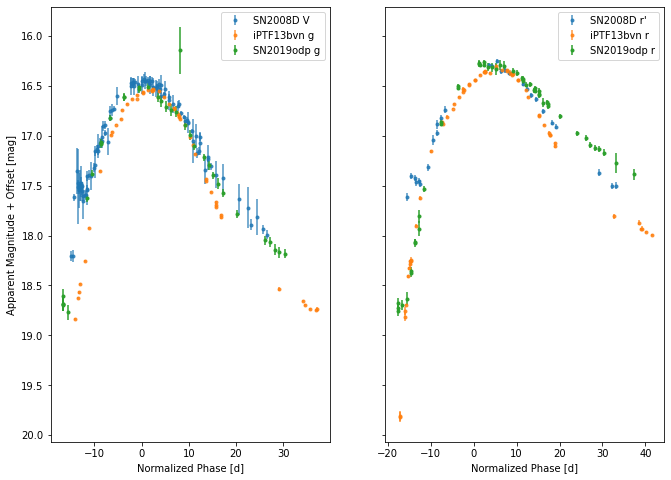

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(11,8), sharey=True)

df = sn2008d.query("band == \"V\" and phase < 40")
axs[0].errorbar((df['phase']-2.5)/1.2, df['mag']-0.9, yerr=df['mag_err'], label='SN2008D V', fmt='.', alpha=0.8)
df = ptf13bvn.query("band == \"g\" and phase < 30")
axs[0].errorbar((df['phase']+4)/0.9, df['mag']+1.0, yerr=df['mag_err'], label='iPTF13bvn g', fmt='.', alpha=0.8)


band = 'g'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
axs[0].errorbar(ztf['obsmjd'][idx] - const.sne_peak_mjd['g'], ztf['mag'][idx], yerr=ztf['mag_err'][idx], label='SN2019odp %s' % band, fmt='.')

axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_xlabel('Normalized Phase [d]')
axs[0].set_ylabel('Apparent Magnitude + Offset [mag]')

df = sn2008d.query("band == \"r'\" and phase < 40")
axs[1].errorbar(df['phase']-1.0, df['mag']-0.7, yerr=df['mag_err'], label='SN2008D r\'', fmt='.', alpha=0.8)
df = ptf13bvn.query("band == \"r\" and phase < 30")
axs[1].errorbar((df['phase']+4)/0.8, df['mag']+1.2, yerr=df['mag_err'], label='iPTF13bvn r', fmt='.', alpha=0.8)


df = sn2008d.query("band == \"R\" and phase < 40")
#plt.errorbar(df['phase'], df['mag'], yerr=df['mag_err'], label='SN2018D R', fmt='.')

band = 'r'
idx = np.logical_and(ztf['filter'] == ('ZTF_%s' % band),
                     np.logical_and(ztf['phase'] > -27, ztf['phase'] < 40))
#axs[1].errorbar((ztf['obsmjd'][idx] - const.sne_peak_mjd['g']+2.5)*1.2, ztf['mag'][idx]+0.7, yerr=ztf['mag_err'][idx], label='SN2019odp %s' % band, fmt='.')
axs[1].errorbar(ztf['obsmjd'][idx] - const.sne_peak_mjd['g'], ztf['mag'][idx], yerr=ztf['mag_err'][idx], label='SN2019odp %s' % band, fmt='.')


#plt.gca().invert_yaxis()
axs[1].legend()

axs[1].set_xlabel('Normalized Phase [d]')
#plt.ylabel('Apparent Magnitude + Offset [mag]')

plt.savefig('../paper/plots/tmp_lc_gr.png')

In [38]:
for band in ptf13bvn['band'].unique():
    print(band, ptf13bvn.query('band == "%s"' % band).__len__())

r 95
i 86
g 86
UVW1 12
B 96
V 94
z 33
U 27
R 70
I 71
UVW2 7
UVM2 1


In [60]:
sn2008d.query('band == "U"')

mjd band instrument     mag  mag_err    phase
14   54476.1478    U       UVOT  18.348    0.188 -13.8522
18   54476.2761    U       UVOT  18.473    0.168 -13.7239
26   54476.4338    U       UVOT  18.460    0.146 -13.5662
36   54476.6400    U       None  18.660    0.050 -13.3600
39   54476.7026    U       UVOT  18.517    0.142 -13.2974
44   54477.0122    U       UVOT  18.845    0.190 -12.9878
59   54477.5505    U       UVOT  18.982    0.192 -12.4495
65   54477.6900    U       None  19.110    0.050 -12.3100
81   54478.5181    U       UVOT  19.292    0.233 -11.4819
87   54478.6800    U       None  19.140    0.050 -11.3200
93   54479.5205    U       UVOT  19.300    0.233 -10.4795
104  54480.5248    U       UVOT  19.372    0.257  -9.4752
110  54480.7300    U       None  19.290    0.050  -9.2700
116  54481.4990    U       UVOT  19.305    0.242  -8.5010
127  54481.7900    U       None  19.090    0.050  -8.2100
141  54482.5361    U       UVOT  19.208    0.206  -7.4639
147  54482.7800    U       None  19.010    0.050  -7.2200
158  54483.8776    U       UVOT  19.225    0.226  -6.1224
178  54486.2156    U       UVOT  19.064    0.187  -3.7844
188  54489.7657    U       UVOT  18.901    0.171  -0.2343
195  54490.4100    U       None  18.780    0.050   0.4100
197  54490.6316    U       UVOT  18.942    0.173   0.6316
201  54491.5039    U       UVOT  19.070    0.188   1.5039
207  54492.5300    U       None  18.760    0.050   2.5300
209  54492.6395    U       UVOT  19.107    0.193   2.6395
213  54493.4386    U       UVOT  19.064    0.188   3.4386
219  54493.6600    U       None  18.910    0.050   3.6600
227  54494.5440    U       UVOT  19.097    0.196   4.5440
233  54494.6500    U       None  18.910    0.050   4.6500
242  54495.5160    U       UVOT  19.200    0.219   5.5160
245  54496.1141    U       UVOT  19.265    0.232   6.1141
255  54496.4900    U       None  19.060    0.050   6.4900
260  54496.7000    U       None  19.040    0.050   6.7000
271  54497.5289    U       UVOT  19.246    0.225   7.5289
280  54498.3927    U       UVOT  19.283    0.226   8.3927
290  54499.5304    U       UVOT  19.792    0.332   9.5304
294  54500.4659    U       UVOT  19.763    0.328  10.4659
314  54503.6200    U       None  20.040    0.050  13.6200
340  54506.6600    U       None  20.440    0.050  16.6600

In [62]:
sn2008d.query('band == "r\'"')

mjd band instrument     mag  mag_err      phase
9    54475.40800   r'       None  18.314    0.036  -14.59200
27   54476.43472   r'       None  18.099    0.031  -13.56528
48   54477.26301   r'       None  18.125    0.031  -12.73699
55   54477.45935   r'       None  18.166    0.032  -12.54065
69   54478.29949   r'       None  18.152    0.032  -11.70051
77   54478.48174   r'       None  18.179    0.032  -11.51826
100  54480.39146   r'       None  18.014    0.035   -9.60854
120  54481.50896   r'       None  17.744    0.049   -8.49104
133  54482.41694   r'       None  17.586    0.043   -7.58306
135  54482.43498   r'       None  17.670    0.032   -7.56502
151  54483.27777   r'       None  17.517    0.025   -6.72223
165  54484.36358   r'       None  17.437    0.031   -5.63642
223  54494.46605   r'       None  16.994    0.023    4.46605
237  54495.36388   r'       None  17.005    0.023    5.36388
248  54496.33771   r'       None  16.951    0.022    6.33771
268  54497.39757   r'       None  17.054    0.027    7.39757
275  54498.30879   r'       None  17.044    0.024    8.30879
286  54499.35113   r'       None  17.071    0.022    9.35113
302  54502.43944   r'       None  17.182    0.023   12.43944
307  54503.34666   r'       None  17.228    0.021   13.34666
319  54504.37125   r'       None  17.294    0.023   14.37125
328  54505.41571   r'       None  17.331    0.025   15.41571
343  54507.21603   r'       None  17.454    0.027   17.21603
356  54509.27640   r'       None  17.568    0.026   19.27640
363  54510.16319   r'       None  17.608    0.025   20.16319
378  54520.25644   r'       None  18.069    0.035   30.25644
383  54523.24459   r'       None  18.205    0.030   33.24459
386  54524.27715   r'       None  18.199    0.033   34.27715
390  54531.13424   r'       None  18.311    0.031   41.13424
394  54536.16027   r'       None  18.490    0.033   46.16027
398  54537.15307   r'       None  18.533    0.033   47.15307
403  54539.11959   r'       None  18.540    0.037   49.11959
407  54545.10737   r'       None  18.752    0.077   55.10737
408  54547.10620   r'       None  18.725    0.068   57.10620
412  54553.12764   r'       None  18.849    0.042   63.12764
415  54558.10340   r'       None  18.971    0.053   68.10340
421  54572.16715   r'       None  19.270    0.089   82.16715
425  54575.24338   r'       None  19.235    0.075   85.24338
428  54579.12469   r'       None  19.333    0.063   89.12469
432  54583.14050   r'       None  19.435    0.065   93.14050
434  54585.16881   r'       None  19.416    0.107   95.16881
435  54590.16590   r'       None  19.551    0.083  100.16590
438  54594.15625   r'       None  19.637    0.083  104.15625
441  54615.14566   r'       None  20.043    0.131  125.14566

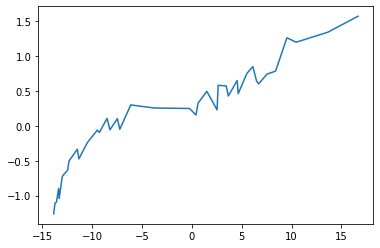

In [68]:
# U - r lightcurve
u_mjd = np.array(sn2008d.query('band == "U"')['mjd'])
u_mag = np.array(sn2008d.query('band == "U"')['mag'])
r_mjd = np.array(sn2008d.query('band == "r\'"')['mjd'])
r_mag = np.array(sn2008d.query('band == "r\'"')['mag'])

r_mag_interp = np.interp(u_mjd, r_mjd, r_mag)
plt.plot(u_mjd - 54490, u_mag-4.1*0.8-(r_mag_interp-2.285*0.8), label='SN2008D')